In [33]:
import numpy as np

import SimpleITK as sitk
path_to_sitk_image = 'E:\\4Dnet - LALAA\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task005_LALAA\\imagesTr\\56003_0000.nii.gz'
image = sitk.ReadImage(path_to_sitk_image)
resample = sitk.ResampleImageFilter()
resample.SetInterpolator = sitk.sitkLinear
resample.SetOutputDirection = image.GetDirection()
resample.SetOutputOrigin = image.GetOrigin()
new_spacing = tuple([0.40820312, 0.40820312, 0.40002441])
resample.SetOutputSpacing(new_spacing)

orig_size = np.array(image.GetSize(), dtype=np.int)
orig_spacing = image.GetSpacing()
new_size = orig_size*np.divide(orig_spacing,new_spacing)
new_size = np.ceil(new_size).astype(np.int) #  Image dimensions are in integers
new_size = [int(s) for s in new_size]
resample.SetSize(new_size)

newimage = resample.Execute(image)

In [18]:
new_spacing

(0.40820312, 0.40002441, 0.40820312)

In [19]:
orig_spacing

(1.4062999486923218, 1.4062999486923218, 1.100000023841858)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
from medpy.io import load # libreria python medimages
import medpy.io.save as med
from sklearn import preprocessing
from PIL import Image # libreria python images
from scipy import ndimage, misc
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

In [4]:
import glob 
import re
spacing = [0.40820312, 0.40820312, 0.40002441]
#path = 'E:\\4Dnet - LALAA\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task005_LALAA\\imagesTr\\'
path = 'E:\\4Dnet - LALAA\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task005_LALAA\\labelsTr\\'
ims = glob.glob(path+"\\*.nii.gz")

for ii in range(0,len(ims)):
    #case =  re.sub("[^0-9]", "", ims[ii][-25:-12])
    case =  re.sub("[^0-9]", "", ims[ii][-25:-7])
    #image_data, image_header = load(path+str(case)+'_0000.nii.gz')
    image_data, image_header = load(path+str(case)+'.nii.gz')
    image_header.set_voxel_spacing(spacing)
    image_datat = image_data.transpose()
    image = [0]*image_data.shape[2]
    for j in range(image_data.shape[2]):
        image[j] = resize(image_datat[j], (128, 128))
    im = np.array(image)
    imt = im.transpose()
    #med(imt, 'E:\\Prova_rescale\\Case'+str(case[1:])+'.nii.gz',image_header)
    med(imt, 'E:\\Prova_rescale\\labels\\case'+str(case[1:])+'_1.nii.gz',image_header)

In [ ]:
import glob 
import re

path = 'E:\\Prova_rescale\\'
ims = glob.glob(path+"\\*.nii.gz")

for ii in range(0,len(ims)):
    case =  re.sub("[^0-9]", "", ims[ii][-19:-7])
    image_data, image_header = load(path+'Case'+str(case)+'.nii.gz')
    #print(image_header.get_voxel_spacing())
    print(image_data.shape)

In [3]:
image_data, image_header = load('E:\\4Dnet - LALAA\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task005_LALAA\\imagesTr\\56003_0000.nii.gz')

In [4]:
print(image_data.shape)
print(image_header.get_voxel_spacing())
print(image_header.get_offset())
print(image_header)

(256, 178, 160)
(1.4062999486923218, 1.4062999486923218, 1.100000023841858)
(0.0, 0.0, 0.0)


In [5]:
# Només agafa primera direcció, transposo per a què quedi bé
image_datat = image_data.transpose()

In [51]:
image_datat.shape

(160, 178, 256)

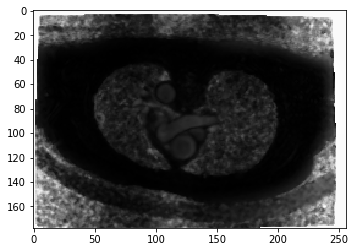

In [7]:
plt.figure()
plt.imshow(image_datat[100], cmap = cm.Greys_r);

In [10]:
pip install SimpleITK

Note: you may need to restart the kernel to use updated packages.


(256, 178, 160)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Enter the index of the slice you would like to see100


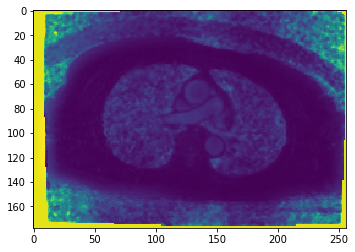

In [42]:
image = sitk.ReadImage('E:\\4Dnet - LALAA\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task005_LALAA\\imagesTr\\56003_0000.nii.gz', imageIO="NiftiImageIO")
print(image.GetSize())
resampled = rotation3d(image,180,show=True)
sitk.WriteImage(resampled, 'E:\\prova1.nii.gz')

In [43]:
image = sitk.ReadImage('E:\\prova1.nii.gz', imageIO="NiftiImageIO")


In [41]:
image.GetSize()

(256, 178, 160)

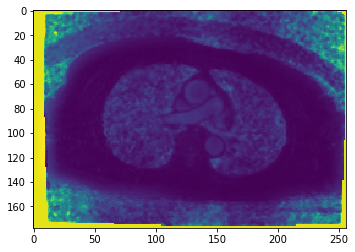

In [44]:
plt.imshow(sitk.GetArrayFromImage(image)[100])

In [ ]:
plt.figure()
plt.imshow(resampledt[50], cmap = cm.Greys_r);

In [3]:
import pandas as pd

In [5]:
pd.read_pickle('E:\\Prova_rescale\\nnUNetPlansv2.1_plans_3D.pkl')

{'num_stages': 2,
 'num_modalities': 1,
 'modalities': {0: 'CT'},
 'normalization_schemes': OrderedDict([(0, 'CT')]),
 'dataset_properties': {'all_sizes': [(372, 700, 880),
   (460, 700, 880),
   (416, 611, 880),
   (504, 611, 880),
   (504, 700, 880),
   (394, 790, 880),
   (504, 700, 880),
   (372, 700, 880),
   (372, 611, 880),
   (504, 611, 880),
   (350, 700, 880),
   (416, 700, 880),
   (416, 659, 880),
   (460, 700, 880),
   (438, 790, 880),
   (504, 611, 880),
   (394, 700, 880),
   (438, 611, 880),
   (372, 611, 880),
   (460, 659, 880),
   (416, 700, 880),
   (394, 611, 880),
   (416, 611, 880),
   (482, 659, 880),
   (504, 700, 880),
   (504, 611, 880),
   (416, 700, 880),
   (416, 790, 880),
   (394, 611, 880),
   (438, 700, 880),
   (416, 790, 880),
   (460, 611, 880),
   (372, 611, 880),
   (416, 700, 880),
   (504, 700, 880),
   (482, 659, 880),
   (504, 611, 880),
   (438, 611, 880),
   (438, 700, 880),
   (350, 611, 880),
   (438, 611, 880),
   (328, 611, 880),
   (460

In [6]:
pd.read_pickle('E:\\TFM\\nnUNetPlansv2.1_plans_3D.pkl')

{'num_stages': 1,
 'num_modalities': 1,
 'modalities': {0: 'CT'},
 'normalization_schemes': OrderedDict([(0, 'CT')]),
 'dataset_properties': {'all_sizes': [(305, 128, 128),
   (350, 128, 128),
   (305, 128, 128),
   (353, 128, 128),
   (314, 128, 128),
   (271, 128, 128),
   (305, 128, 128),
   (271, 128, 128),
   (214, 128, 128),
   (271, 128, 128),
   (305, 128, 128),
   (339, 128, 128),
   (271, 128, 128),
   (321, 128, 128),
   (305, 128, 128),
   (223, 128, 128),
   (290, 128, 128),
   (437, 128, 128),
   (368, 128, 128),
   (264, 128, 128),
   (334, 128, 128),
   (437, 128, 128),
   (572, 128, 128),
   (566, 128, 128),
   (582, 128, 128),
   (525, 128, 128),
   (486, 128, 128),
   (343, 128, 128),
   (489, 128, 128),
   (341, 128, 128),
   (509, 128, 128),
   (454, 128, 128),
   (616, 128, 128),
   (522, 128, 128),
   (436, 128, 128),
   (509, 128, 128),
   (472, 128, 128),
   (522, 128, 128),
   (495, 128, 128),
   (276, 128, 128),
   (479, 128, 128),
   (536, 128, 128),
   (562

In [5]:
pd.read_pickle('E:\\TFM\\dataset_properties.pkl')

{'all_sizes': [(136, 128, 128),
  (168, 128, 128),
  (152, 128, 128),
  (184, 128, 128),
  (184, 128, 128),
  (144, 128, 128),
  (184, 128, 128),
  (136, 128, 128),
  (136, 128, 128),
  (184, 128, 128),
  (128, 128, 128),
  (152, 128, 128),
  (152, 128, 128),
  (168, 128, 128),
  (160, 128, 128),
  (184, 128, 128),
  (144, 128, 128),
  (160, 128, 128),
  (136, 128, 128),
  (168, 128, 128),
  (152, 128, 128),
  (144, 128, 128),
  (152, 128, 128),
  (176, 128, 128),
  (184, 128, 128),
  (184, 128, 128),
  (152, 128, 128),
  (152, 128, 128),
  (144, 128, 128),
  (160, 128, 128),
  (152, 128, 128),
  (168, 128, 128),
  (136, 128, 128),
  (152, 128, 128),
  (184, 128, 128),
  (176, 128, 128),
  (184, 128, 128),
  (160, 128, 128),
  (160, 128, 128),
  (128, 128, 128),
  (160, 128, 128),
  (120, 128, 128),
  (168, 128, 128),
  (184, 128, 128),
  (168, 128, 128),
  (152, 128, 128),
  (152, 128, 128),
  (176, 128, 128),
  (168, 128, 128),
  (176, 128, 128),
  (176, 128, 128),
  (152, 128, 128),

In [2]:
pd.read_pickle('E:\\dataset_properties.pkl')

{'all_sizes': [(305, 128, 128),
  (350, 128, 128),
  (305, 128, 128),
  (353, 128, 128),
  (314, 128, 128),
  (271, 128, 128),
  (305, 128, 128),
  (271, 128, 128),
  (214, 128, 128),
  (271, 128, 128),
  (305, 128, 128),
  (339, 128, 128),
  (271, 128, 128),
  (321, 128, 128),
  (305, 128, 128),
  (223, 128, 128),
  (290, 128, 128),
  (437, 128, 128),
  (368, 128, 128),
  (264, 128, 128),
  (334, 128, 128),
  (437, 128, 128),
  (572, 128, 128),
  (566, 128, 128),
  (582, 128, 128),
  (525, 128, 128),
  (486, 128, 128),
  (343, 128, 128),
  (489, 128, 128),
  (341, 128, 128),
  (509, 128, 128),
  (454, 128, 128),
  (616, 128, 128),
  (522, 128, 128),
  (436, 128, 128),
  (509, 128, 128),
  (472, 128, 128),
  (522, 128, 128),
  (495, 128, 128),
  (276, 128, 128),
  (479, 128, 128),
  (536, 128, 128),
  (562, 128, 128),
  (509, 128, 128),
  (596, 128, 128),
  (502, 128, 128),
  (382, 128, 128),
  (486, 128, 128),
  (271, 128, 128),
  (482, 128, 128),
  (739, 128, 128),
  (656, 128, 128),

In [2]:
!pip install vtk

In [3]:
import os
import nibabel as nib
import SimpleITK as sitk
import vtk


def read_image(vtk_file_dir):
    reader = vtk.vtkNIFTIImageReader()
    reader.SetFileName(vtk_file_dir)
    reader.Update()
    return reader.GetOutput()
def resampling(im, voxel_spacing):
    resliceFilter = vtk.vtkImageReslice()
    resliceFilter.SetInputData(im)
    resliceFilter.SetOutputSpacing(voxel_spacing)
    resliceFilter.SetInterpolationModeToCubic()
    resliceFilter.Update()
    return resliceFilter.GetOutput()
def write_image(im, path):
    writer = vtk.vtkNIFTIImageWriter()
    writer.SetFileName(path)
    writer.SetInputData(im)
    writer.Write()



In [4]:
import SimpleITK as sitk
def matrix_from_axis_angle(a):
    """ Compute rotation matrix from axis-angle.
    This is called exponential map or Rodrigues' formula.
    Parameters
    ----------
    a : array-like, shape (4,)
        Axis of rotation and rotation angle: (x, y, z, angle)
    Returns
    -------
    R : array-like, shape (3, 3)
        Rotation matrix
    """
    ux, uy, uz, theta = a
    c = np.cos(theta)
    s = np.sin(theta)
    ci = 1.0 - c
    R = np.array([[ci * ux * ux + c,
                   ci * ux * uy - uz * s,
                   ci * ux * uz + uy * s],
                  [ci * uy * ux + uz * s,
                   ci * uy * uy + c,
                   ci * uy * uz - ux * s],
                  [ci * uz * ux - uy * s,
                   ci * uz * uy + ux * s,
                   ci * uz * uz + c],
                  ])

    # This is equivalent to
    # R = (np.eye(3) * np.cos(theta) +
    #      (1.0 - np.cos(theta)) * a[:3, np.newaxis].dot(a[np.newaxis, :3]) +
    #      cross_product_matrix(a[:3]) * np.sin(theta))

    return R


def resample(image, transform):
    """
    This function resamples (updates) an image using a specified transform
    :param image: The sitk image we are trying to transform
    :param transform: An sitk transform (ex. resizing, rotation, etc.
    :return: The transformed sitk image
    """
    reference_image = image
    interpolator = sitk.sitkLinear
    default_value = 0
    return sitk.Resample(image, reference_image, transform,
                         interpolator, default_value)


def get_center(img):
    """
    This function returns the physical center point of a 3d sitk image
    :param img: The sitk image we are trying to find the center of
    :return: The physical center point of the image
    """
    width, height, depth = img.GetSize()
    return img.TransformIndexToPhysicalPoint((int(np.ceil(width/2)),
                                              int(np.ceil(height/2)),
                                              int(np.ceil(depth/2))))


def rotation3d(image, theta_z, show=False):
    """
    This function rotates an image across each of the x, y, z axes by theta_x, theta_y, and theta_z degrees
    respectively
    :param image: An sitk MRI image
    :param theta_x: The amount of degrees the user wants the image rotated around the x axis
    :param theta_y: The amount of degrees the user wants the image rotated around the y axis
    :param theta_z: The amount of degrees the user wants the image rotated around the z axis
    :param show: Boolean, whether or not the user wants to see the result of the rotation
    :return: The rotated image
    """
    theta_z = np.deg2rad(theta_z)
    euler_transform = sitk.Euler3DTransform()
    print(euler_transform.GetMatrix())
    image_center = get_center(image)
    euler_transform.SetCenter(image_center)

    direction = image.GetDirection()
    axis_angle = (direction[2], direction[5], direction[8], theta_z)
    np_rot_mat = matrix_from_axis_angle(axis_angle)
    euler_transform.SetMatrix(np_rot_mat.flatten().tolist())
    resampled_image = resample(image, euler_transform)
    if show:
        slice_num = int(input("Enter the index of the slice you would like to see"))
        plt.imshow(sitk.GetArrayFromImage(resampled_image)[slice_num])
        plt.show()
    return resampled_image

In [15]:

fold0_i = 'E:\\4Dnet - LALAA\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task005_LALAA\\imagesTr\\'
fold0_m = 'E:\\4Dnet - LALAA\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task005_LALAA\\labelsTr\\'
fold1_i = 'E:\\Prova_rescale\\'
fold1_m = 'E:\\Prova_rescale\\labels\\'

files = os.listdir(fold0_i)
voxel_spacing = [0.40820312, 0.40820312, 0.40002441]

for file in files:

    m = nib.load(os.path.join(fold0_m, file[:-12] + '.nii.gz').replace('\\', '/'))
    nib.save(m, os.path.join(fold0_m, file[:-12] + '.nii.gz').replace('\\', '/'))

    img = read_image(os.path.join(fold0_i, file).replace('\\', '/'))
    mask = read_image(os.path.join(fold0_m, file[:-12]+'.nii.gz').replace('\\', '/'))

    img2 = resampling(img, voxel_spacing)
    mask2 = resampling(mask, voxel_spacing)
    
    write_image(img2, os.path.join(fold1_i, file).replace('\\', '/'))
    write_image(mask2, os.path.join(fold1_m, file[:-12]+'.nii.gz').replace('\\', '/'))


In [16]:
fold0_i = 'E:\\4Dnet - LALAA\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task005_LALAA\\imagesTs\\'
fold0_m = 'E:\\4Dnet - LALAA\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task005_LALAA\\labelsTs\\'
fold1_i = 'E:\\Prova_rescale\\test\\'
fold1_m = 'E:\\Prova_rescale\\test\\labels\\'


files = os.listdir(fold0_i)
voxel_spacing = [0.40820312, 0.40820312, 0.40002441]

for file in files:

    m = nib.load(os.path.join(fold0_m, file[:-12] + '.nii.gz').replace('\\', '/'))
    nib.save(m, os.path.join(fold0_m, file[:-12] + '.nii.gz').replace('\\', '/'))

    img = read_image(os.path.join(fold0_i, file).replace('\\', '/'))
    mask = read_image(os.path.join(fold0_m, file[:-12]+'.nii.gz').replace('\\', '/'))

    img2 = resampling(img, voxel_spacing)
    mask2 = resampling(mask, voxel_spacing)
    
    write_image(img2, os.path.join(fold1_i, file).replace('\\', '/'))
    write_image(mask2, os.path.join(fold1_m, file[:-12]+'.nii.gz').replace('\\', '/'))


In [19]:
import glob 
import re

path = 'E:\\Prova_rescale\\'
#path = 'E:\\Prova_rescale\\labels\\'
output = 'E:\\Prova_rescale\\training\\'

ims = glob.glob(path+"\\*.nii.gz")

for ii in range(0,len(ims)):
    case =  re.sub("[^0-9]", "", ims[ii][-25:-12])
    #case =  re.sub("[^0-9]", "", ims[ii][-25:-7])
    image = sitk.ReadImage(path+str(case)+'_0000.nii.gz', imageIO="NiftiImageIO")
    #mask = sitk.ReadImage(path+str(case)+'.nii.gz', imageIO="NiftiImageIO")
    img2_resampled = rotation3d(image,180,show=False)
    #mask2_resampled = rotation3d(mask,180,show=False)
    
    sitk.WriteImage(img2_resampled, output+'Case'+str(case[1:])+'.nii.gz')
    #sitk.WriteImage(mask2_resampled, output+'case'+str(case[1:])+'_1.nii.gz')


(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0

In [5]:
import glob 
import re

path = 'E:\\Prova_rescale\\test\\'
#path = 'E:\\Prova_rescale\\test\\labels\\'
output = 'E:\\Prova_rescale\\testing\\'

ims = glob.glob(path+"\\*.nii.gz")

for ii in range(0,len(ims)):
    case =  re.sub("[^0-9]", "", ims[ii][-25:-12])
    #case =  re.sub("[^0-9]", "", ims[ii][-25:-7])
    image = sitk.ReadImage(path+str(case)+'_0000.nii.gz', imageIO="NiftiImageIO")
    #mask = sitk.ReadImage(path+str(case)+'.nii.gz', imageIO="NiftiImageIO")
    img2_resampled = rotation3d(image,180,show=False)
    #mask2_resampled = rotation3d(mask,180,show=False)
    
    sitk.WriteImage(img2_resampled, output+'Case'+str(case[1:])+'.nii.gz')
    #sitk.WriteImage(mask2_resampled, output+'case'+str(case[1:])+'_1.nii.gz')


(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
